## **Lab 04**

k-Nearest Neighbors (k-NN) algorithm.


*   Data Preparation: A small subset (10 images) of the Digits dataset is loaded and reduced to 2D using PCA for easy visualization.
*   Graph Construction: Nodes are connected based on similarity between the digits (using Euclidean distance). Only nodes that are "similar" are connected with edges.


*  Graph Coloring: The goal is to assign different colors to nodes such that no two connected nodes share the same color. In this case, the color represents the digit class (0-9).
*   Visualization: The graph is visualized step-by-step during the coloring process, allowing the user to observe how the graph gets colored without conflicts.









Running graph coloring on a small subset of the digits dataset.


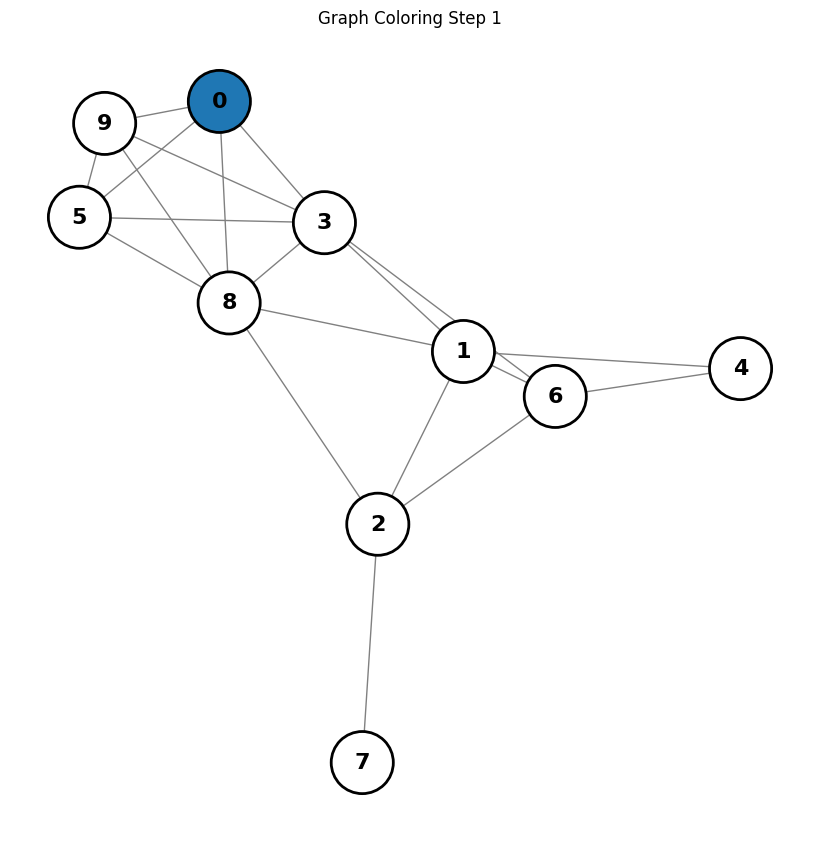

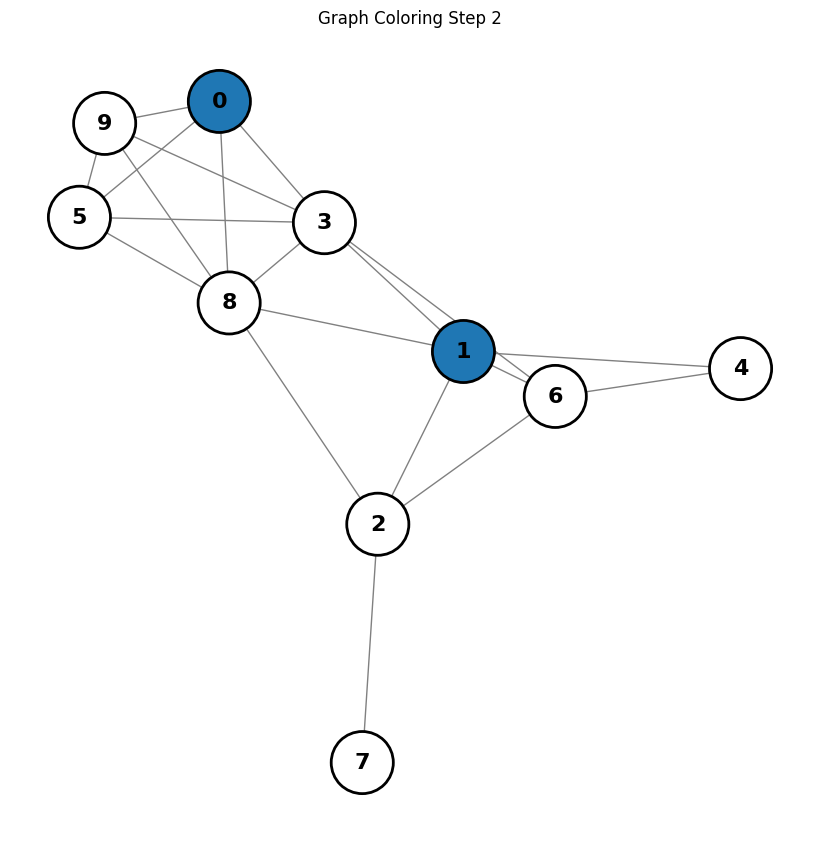

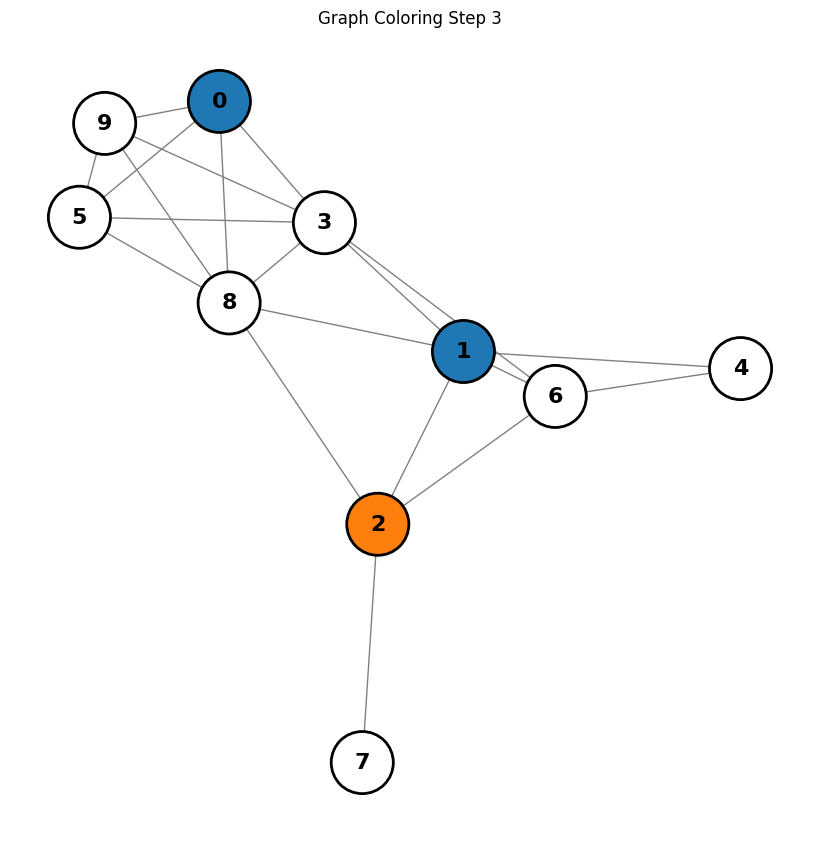

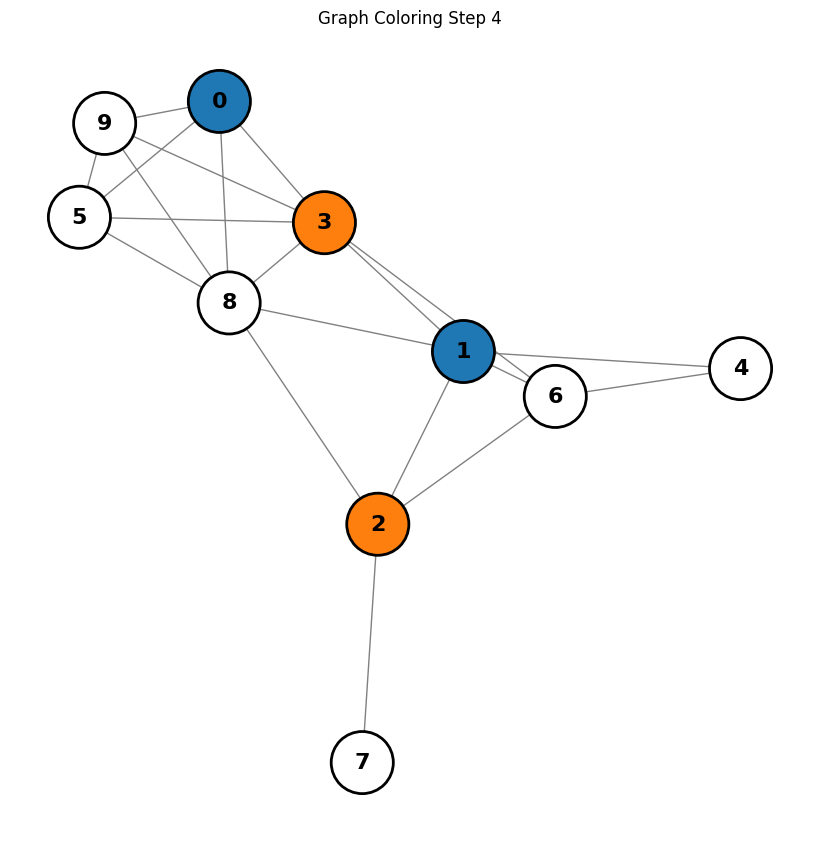

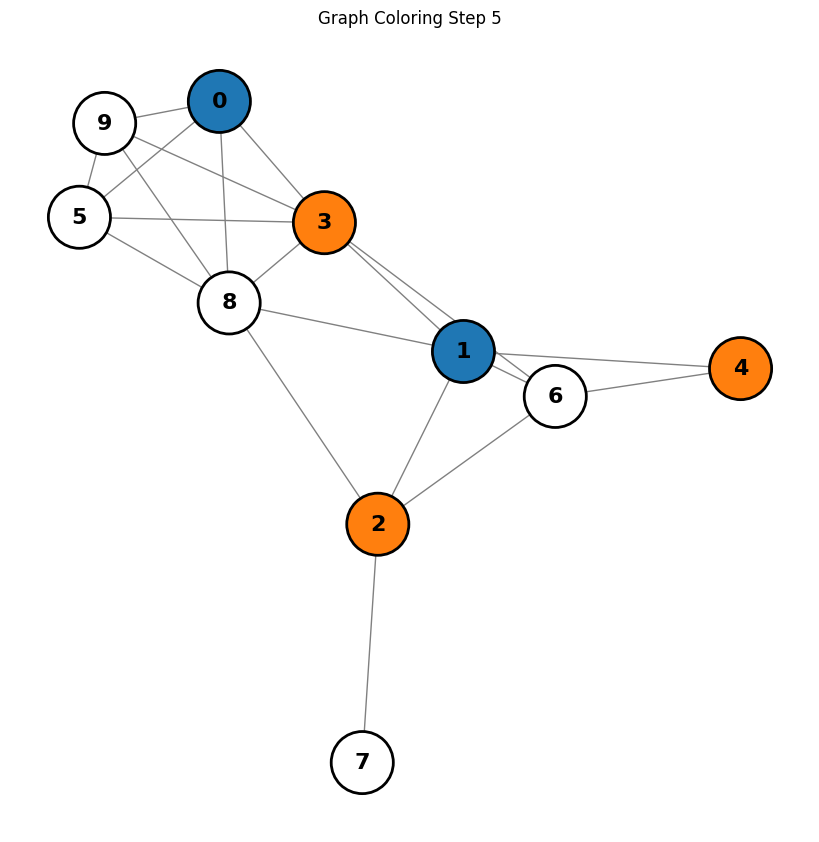

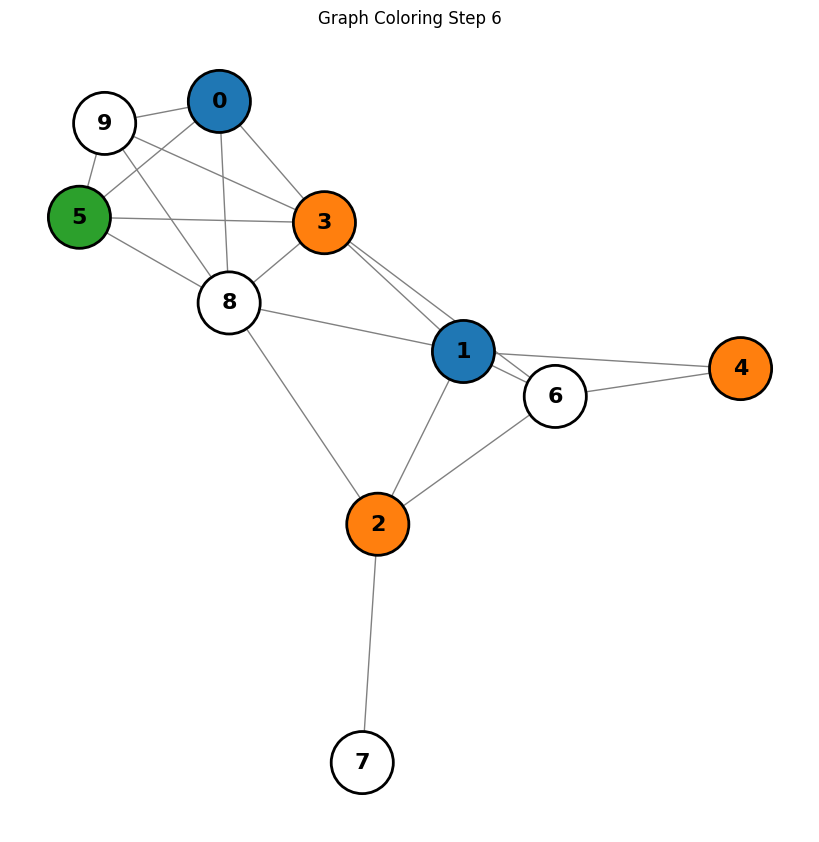

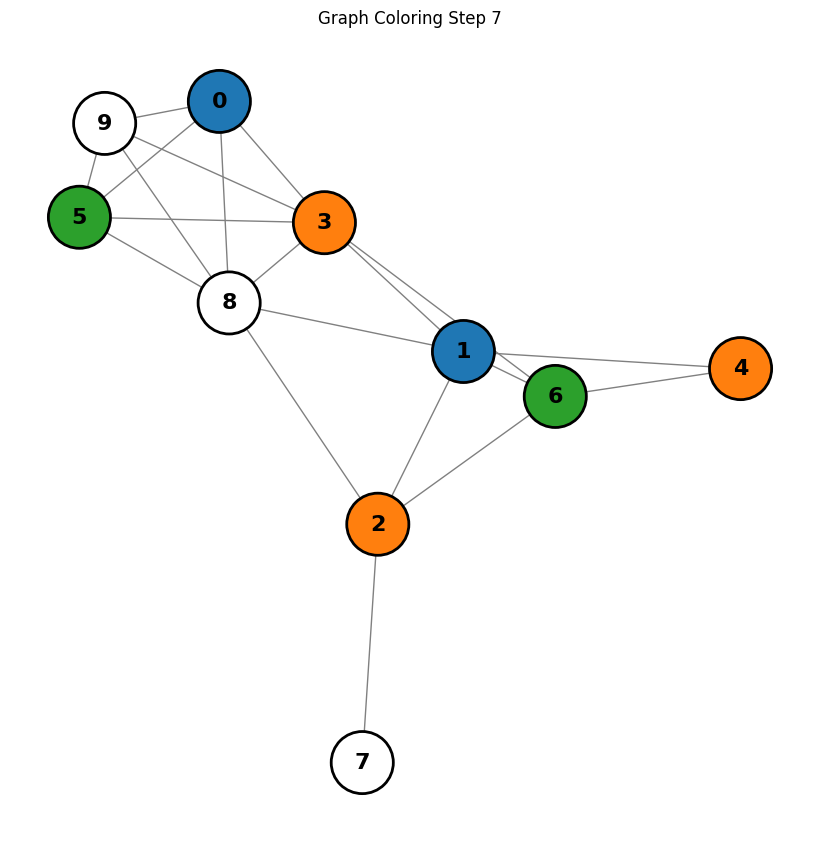

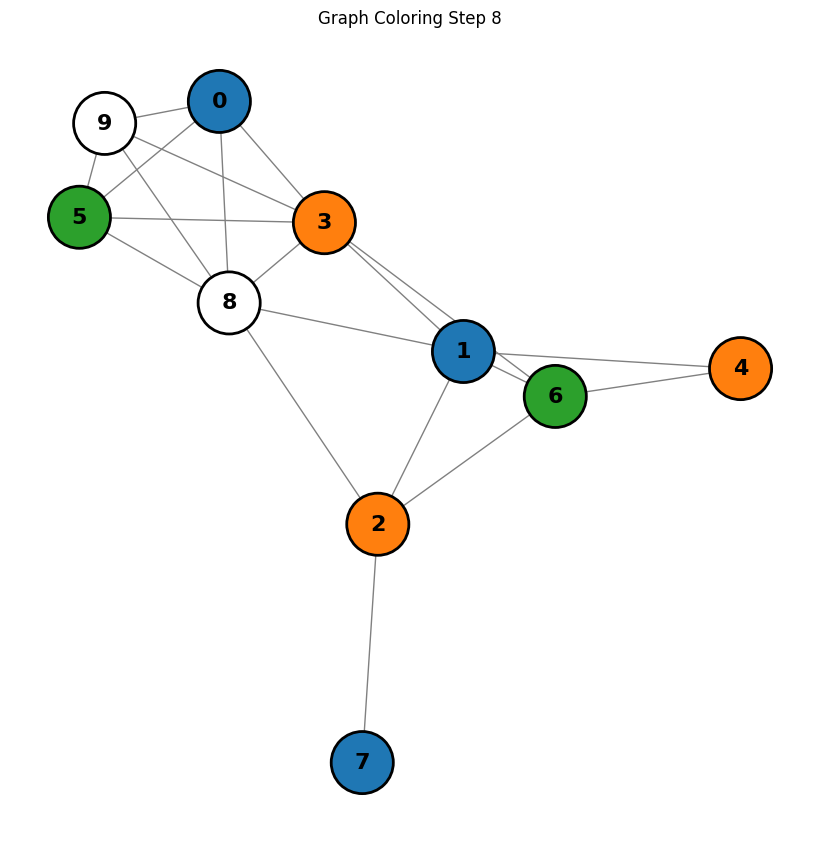

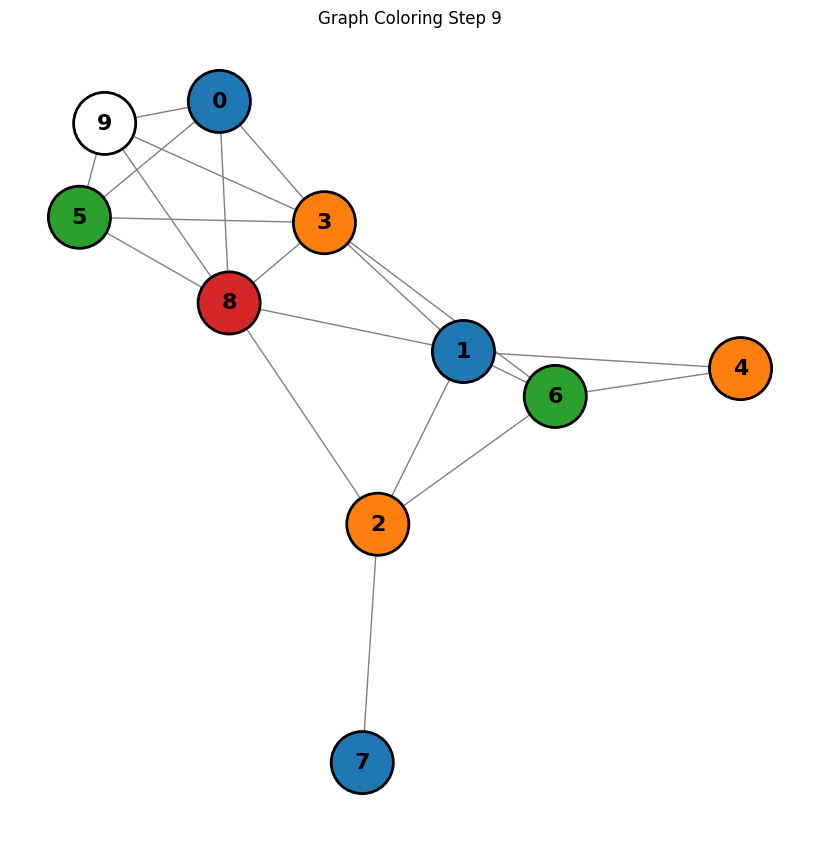

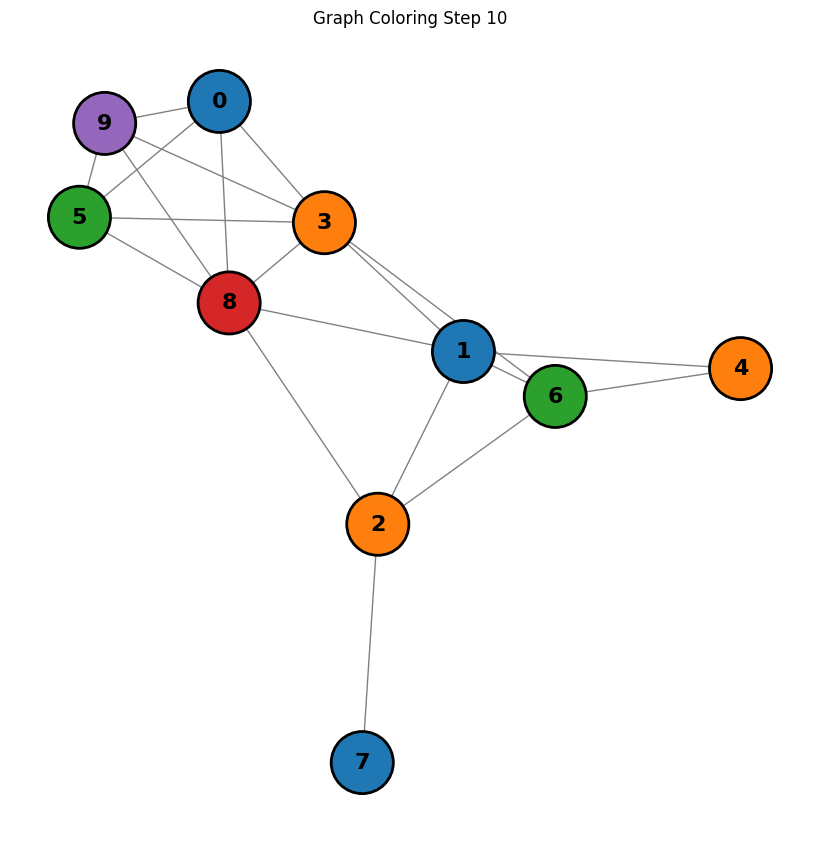

Final Assignment: {0: '0', 1: '0', 2: '1', 3: '1', 4: '1', 5: '2', 6: '2', 7: '0', 8: '3', 9: '4'}


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

# Step 1: Load the digits dataset and reduce it to a smaller subset (10 images)
digits = load_digits()
X = digits.data[:10]  # Take only the first 10 images for simplicity
y = digits.target[:10]  # The true labels (0-9) for the first 10 images

# Step 2: Reduce dimensionality for easier visualization
pca = PCA(n_components=2)  # Reduce to 2D
X_2D = pca.fit_transform(X)

# Step 3: Create a graph based on similarity (Euclidean distance)
G = nx.Graph()
for i in range(len(X_2D)):
    G.add_node(i, label=y[i])  # Each node represents a digit image

# Step 4: Define edges between similar digits (based on Euclidean distance)
distances = euclidean_distances(X_2D)
threshold = np.percentile(distances, 50)  # Connect nodes within the 50th percentile of distance
for i in range(len(X_2D)):
    for j in range(i + 1, len(X_2D)):
        if distances[i, j] < threshold:
            G.add_edge(i, j)  # Connect similar nodes

# Step 5: Define available colors (0-9 corresponding to digits)
colors = [str(i) for i in range(10)]

# Step 6: Visualize the graph coloring step by step
def visualize_graph(assignment, step):
    plt.figure(figsize=(8, 8))  # Increase the figure size for better clarity
    pos = nx.spring_layout(G, seed=42)  # Use spring layout for better node spacing

    # Default color for uncolored nodes is white
    node_colors = ['#ffffff'] * len(G.nodes)
    # Assign colors to the nodes based on the current assignment
    for node, color in assignment.items():
        node_colors[node] = plt.cm.tab10(int(color)/9.0)  # Use colormap for different colors

    # Draw the graph with current color assignments
    nx.draw(G, pos, with_labels=True, node_color=node_colors, font_weight='bold',
            node_size=2000, font_size=16, font_color='black', edge_color='gray',
            linewidths=2, node_shape='o', edgecolors='black')

    plt.title(f"Graph Coloring Step {step}")
    plt.show()

# Step 7: Function to check if a color assignment is valid
def is_valid_color(node, color, assignment):
    # Check all neighboring nodes to ensure no conflict (no neighbor has the same color)
    for neighbor in G.neighbors(node):
        if neighbor in assignment and assignment[neighbor] == color:
            return False  # Conflict found
    return True  # No conflict

# Step 8: Backtracking with heuristics
def backtracking_with_heuristics(assignment, heuristic, step):
    if len(assignment) == len(G.nodes):
        return assignment  # All nodes are colored

    # Sequentially assign the next unassigned node
    unassigned_nodes = [node for node in G.nodes if node not in assignment]
    node = unassigned_nodes[0]  # Take the first unassigned node for simplicity

    for color in colors:
        if is_valid_color(node, color, assignment):
            assignment[node] = color  # Assign the color
            visualize_graph(assignment, step)  # Visualize the current step
            result = backtracking_with_heuristics(assignment, heuristic, step + 1)
            if result:
                return result  # Return if a valid coloring is found
            del assignment[node]  # Backtrack if no valid solution is found

    return None  # No solution found, backtrack

# Step 9: Run the graph coloring on the small-scale digits dataset
def color_graph_with_backtracking():
    print("Running graph coloring on a small subset of the digits dataset.")
    final_assignment = backtracking_with_heuristics({}, None, 1)
    print("Final Assignment:", final_assignment)

# Step 10: Execute the small-scale digit graph coloring
color_graph_with_backtracking()
